<a href="https://colab.research.google.com/github/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/Copy_of_INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import torch
from transformers import DistilBertTokenizer, DistilBertModel



In [ ]:
# Read the training data
train_df = pd.read_csv('//content/stsa-train.txt', sep='delimiter=', header=None, names=['Text'], engine='python')
train_df[['Sentiment', 'Text']] = train_df["Text"].str.extract(r'^(\d+)\s+(.*)$')
train_df.head()

# Read the test data
test_df = pd.read_csv('/content/stsa-test.txt', sep='delimiter=', header=None, names=['Text'], engine='python')
test_df[['Sentiment', 'Text']] = test_df["Text"].str.extract(r'^(\d+)\s+(.*)$')
test_df.head()

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
# Text cleaning function
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopword = stopwords.words('english')
w_l = WordNetLemmatizer()

def clean_text(txt):
    txt = "".join([w.lower() for w in txt if w not in string.punctuation])
    txt = re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ", txt)
    tokens = re.split(r'\W+', txt)
    return [w_l.lemmatize(word) for word in tokens if word not in stopword]

train_df['Cleaned_Text'] = train_df['Text'].apply(clean_text)
test_df['Cleaned_Text'] = test_df['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# TF-IDF Vectorization
tf_vect = TfidfVectorizer(analyzer=lambda x: x)  # Pass cleaned tokens directly
X_train_tfidf = tf_vect.fit_transform(train_df['Cleaned_Text'])
X_test_tfidf = tf_vect.transform(test_df['Cleaned_Text'])

In [ ]:
# Train-validation split
x_train, x_val, y_train, y_val = train_test_split(
    X_train_tfidf, train_df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
    print(classification_report(y_val, y_pred))
    cross_val_scores = cross_val_score(model, x_train, y_train, cv=10)
    print(f'Cross-validated Accuracy: {cross_val_scores.mean()}')

In [ ]:

# Model training and evaluation
print("MultinomialNB Results:")
evaluate_model(MultinomialNB(), x_train, y_train, x_val, y_val)

print("\nLinear SVC Results:")
evaluate_model(LinearSVC(), x_train, y_train, x_val, y_val)

print("\nKNeighborsClassifier Results:")
evaluate_model(KNeighborsClassifier(n_neighbors=5, n_jobs=-1), x_train, y_train, x_val, y_val)

print("\nDecisionTreeClassifier Results:")
evaluate_model(DecisionTreeClassifier(), x_train, y_train, x_val, y_val)

print("\nRandomForestClassifier Results:")
evaluate_model(RandomForestClassifier(), x_train, y_train, x_val, y_val)



MultinomialNB Results:
Accuracy: 0.796242774566474
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.81      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Cross-validated Accuracy: 0.776012364457733

Linear SVC Results:
Accuracy: 0.7911849710982659
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Cross-validated Accuracy: 0.7631886461114629

KNeighborsClassifier Results:
Accuracy: 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.7

In [ ]:
# Word2Vec Embeddings
print("\nWord2Vec with SVM:")
word2vec_model = Word2Vec(sentences=train_df['Cleaned_Text'], vector_size=100, window=5, min_count=1, workers=4)


Word2Vec with SVM:


In [ ]:
def word2vec_vectorizer(tokens, model, vector_size):
    vector = np.zeros(vector_size)
    num_words = 0
    for word in tokens:
        if word in model.wv:
            vector += model.wv[word]
            num_words += 1
    return vector / num_words if num_words > 0 else vector


In [ ]:
train_vectors = np.array([word2vec_vectorizer(tokens, word2vec_model, 100) for tokens in train_df['Cleaned_Text']])
x_train, x_val, y_train, y_val = train_test_split(train_vectors, train_df['Sentiment'], test_size=0.2, random_state=42)
evaluate_model(SVC(), x_train, y_train, x_val, y_val)

Accuracy: 0.5260115606936416
              precision    recall  f1-score   support

           0       0.62      0.06      0.11       671
           1       0.52      0.97      0.68       713

    accuracy                           0.53      1384
   macro avg       0.57      0.51      0.39      1384
weighted avg       0.57      0.53      0.40      1384

Cross-validated Accuracy: 0.5285394402700073


In [ ]:

# DistilBERT Embeddings
print("\nDistilBERT with SVM:")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

def bert_encode_text(texts, tokenizer, model):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()


DistilBERT with SVM:


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_bert_vectors = bert_encode_text(train_df['Text'].tolist(), tokenizer, model)
x_train, x_val, y_train, y_val = train_test_split(train_bert_vectors, train_df['Sentiment'], test_size=0.2, random_state=42)
evaluate_model(SVC(), x_train, y_train, x_val, y_val)

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
import gensim
import numpy as np
import re

In [ ]:
# Load dataset
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding='utf-8')
print(df.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


<ipython-input-3-08e0d8b3bc3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette=custom_palette)
<ipython-input-3-08e0d8b3bc3e>:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(x='Rating', data=df, palette=custom_palette)


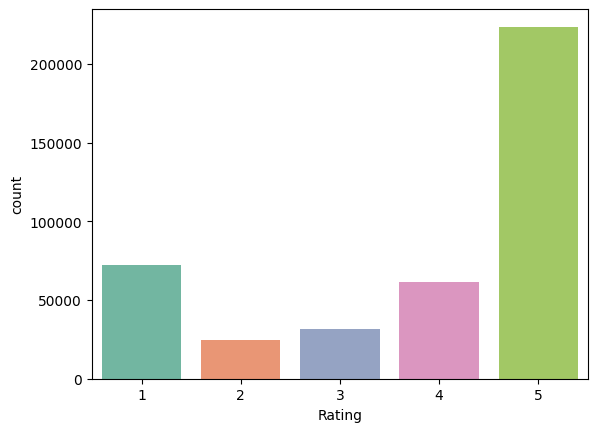

In [ ]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")
sns.countplot(x='Rating', data=df, palette=custom_palette)
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

<ipython-input-4-237dee770dab>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatingPosNeg'].fillna('Unknown', inplace=True)


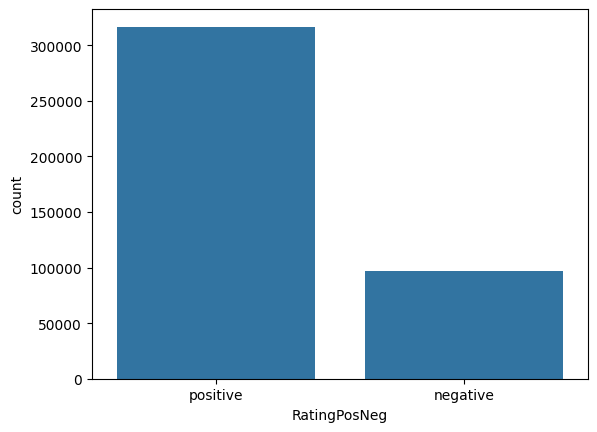

In [ ]:
# Convert Ratings to Positive/Negative sentiment
def classify_rating(rating):
    return 'negative' if rating < 3 else 'positive'

df['RatingPosNeg'] = df['Rating'].map(classify_rating)
# Fill missing values in 'RatingPosNeg'
df['RatingPosNeg'].fillna('Unknown', inplace=True)

sns.countplot(x='RatingPosNeg', data=df)
plt.show()

In [ ]:
# Text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = nltk.stem.SnowballStemmer('english')

def clean_text(text):
    """Clean punctuation from text."""
    text = re.sub(r'[?|!|\'|"|#]', r'', text)
    text = re.sub(r'[.|,|)|(|\|/]', r' ', text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Sample data for efficient processing
final = df.sample(n=10000, random_state=1)
cleaned_texts = []
positive_words, negative_words = [], []

for i, review in enumerate(final['Reviews'].values):
    words = []
    if isinstance(review, str):  # Skip NaN values
        for word in review.split():
            clean_word = clean_text(word).lower()
            if clean_word.isalpha() and clean_word not in stop_words:
                stemmed_word = stemmer.stem(clean_word)
                words.append(stemmed_word)
                if final['RatingPosNeg'].values[i] == 'positive':
                    positive_words.append(stemmed_word)
                elif final['RatingPosNeg'].values[i] == 'negative':
                    negative_words.append(stemmed_word)
    cleaned_texts.append(' '.join(words))

final['CleanedText'] = cleaned_texts

In [ ]:
# Bag of Words
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(final['CleanedText'].values)

In [ ]:
# K-Means clustering with Bag of Words
kmeans_bow = KMeans(n_clusters=10, random_state=99)
kmeans_bow.fit(bow_matrix)
final['Bow_Cluster'] = kmeans_bow.labels_

print("Top terms per cluster:")
terms = vectorizer.get_feature_names_out()
for i in range(10):
    cluster_terms = kmeans_bow.cluster_centers_[i].argsort()[-10:]
    print(f"Cluster {i}: {' '.join(terms[j] for j in cluster_terms)}")

Top terms per cluster:
Cluster 0: would get like one love use good great work phone
Cluster 1: work would android get screen app one like use phone
Cluster 2: one get product like use excel love great good work
Cluster 3: dont would work one screen batteri like get use phone
Cluster 4: get much dont one batteri use phone better like iphon
Cluster 5: good android get card flash sim one app use phone
Cluster 6: would one realli good screen work like get use phone
Cluster 7: softwar turn littl would get connect phone work use watch
Cluster 8: por es lo con un en de la que el
Cluster 9: screen good great get one would like use work phone


In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(final['CleanedText'].values)

kmeans_tfidf = KMeans(n_clusters=10, random_state=99)
kmeans_tfidf.fit(tfidf_matrix)
final['Tfidf_Cluster'] = kmeans_tfidf.labels_

In [ ]:
# Word2Vec embedding
sentences = [text.split() for text in final['CleanedText'].values]
w2v_model = gensim.models.Word2Vec(sentences, vector_size=100, workers=4)

sentence_vectors = np.array([
    np.mean([w2v_model.wv[word] for word in sentence if word in w2v_model.wv] or [np.zeros(100)], axis=0)
    for sentence in sentences
])


In [ ]:
# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(sentence_vectors)
final['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
# Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_model.fit_predict(sentence_vectors)
final['Agglomerative_Cluster'] = agg_labels

In [ ]:
# Display cluster counts
print(final.groupby('Bow_Cluster')['Reviews'].count())
print(final.groupby('Tfidf_Cluster')['Reviews'].count())
print(final.groupby('DBSCAN_Cluster')['Reviews'].count())
print(final.groupby('Agglomerative_Cluster')['Reviews'].count())

Bow_Cluster
0    3128
1      19
2    5624
3     215
4       8
5       4
6     360
7       3
8       9
9     628
Name: Reviews, dtype: int64
Tfidf_Cluster
0     181
1     418
2     345
3     428
4     202
5     366
6      95
7     162
8    3600
9    4201
Name: Reviews, dtype: int64
DBSCAN_Cluster
-1      49
 0    9944
 1       5
Name: Reviews, dtype: int64
Agglomerative_Cluster
0     567
1    1570
2    5971
3    1662
4     228
Name: Reviews, dtype: int64


**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''